In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.shape, test.shape

((7500, 11), (7500, 10))

In [3]:
train.head(3)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0


In [4]:
test.head(3)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,Normal Weight,M,58


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


In [6]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [7]:
test.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.560000,104.058200,95.538933,5.247067,5.714933,165.187413,42.943600
std,8.283402,1.391966,9.579919,0.554436,3.510078,32.986667,17.076529
min,1.000000,99.000000,67.000000,4.000000,0.000000,83.800000,20.000000
25%,8.000000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000
50%,16.000000,104.400000,96.000000,5.000000,5.000000,163.100000,40.000000
75%,23.000000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000
max,30.000000,106.700000,123.000000,7.000000,12.000000,282.200000,79.000000


In [8]:
test.columns

Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
       'Age'],
      dtype='object')

In [9]:
train.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [10]:
test.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
dtype: int64

In [11]:
train.rename(columns = {'Exercise_Duration': '운동시간',
                      'Body_Temperature(F)': '체온',
                      'BPM': '심박수',
                      'Height(Feet)' : '키(피트)',
                      'Height(Remainder_Inches)': '키(인치)', 
                      'Weight(lb)':'몸무게(파운드)', 
                      'Weight_Status':'체중상태', 
                      'Gender': '성별',
                      'Age' : '나이', 
                      'Calories_Burned':'칼로리소모량'}, inplace = True)

In [12]:
test.rename(columns = {'Exercise_Duration': '운동시간',
                      'Body_Temperature(F)': '체온',
                      'BPM': '심박수',
                      'Height(Feet)' : '키(피트)',
                      'Height(Remainder_Inches)': '키(인치)', 
                      'Weight(lb)':'몸무게(파운드)', 
                      'Weight_Status':'체중상태', 
                      'Gender': '성별',
                      'Age' : '나이'}, inplace = True)

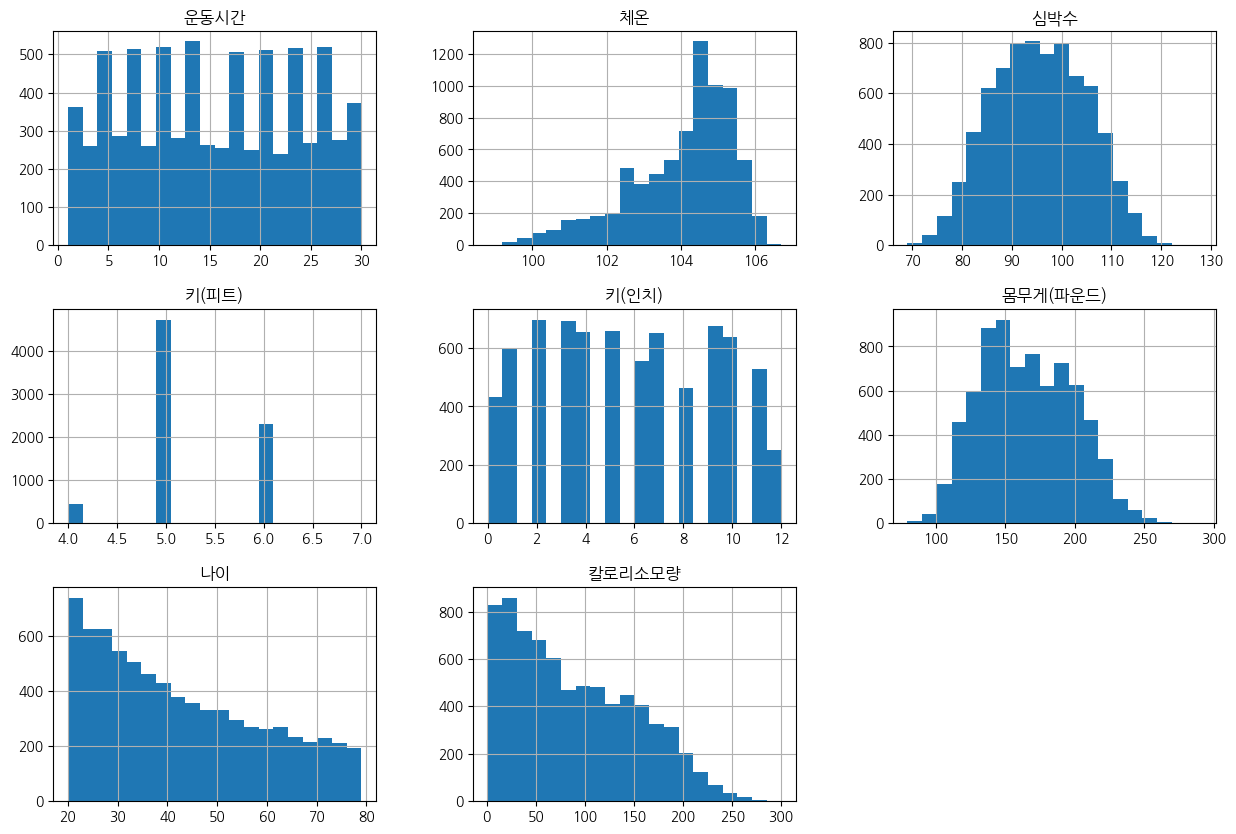

In [13]:
train.hist(bins = 20, figsize = (15, 10)) ; 

<Axes: >

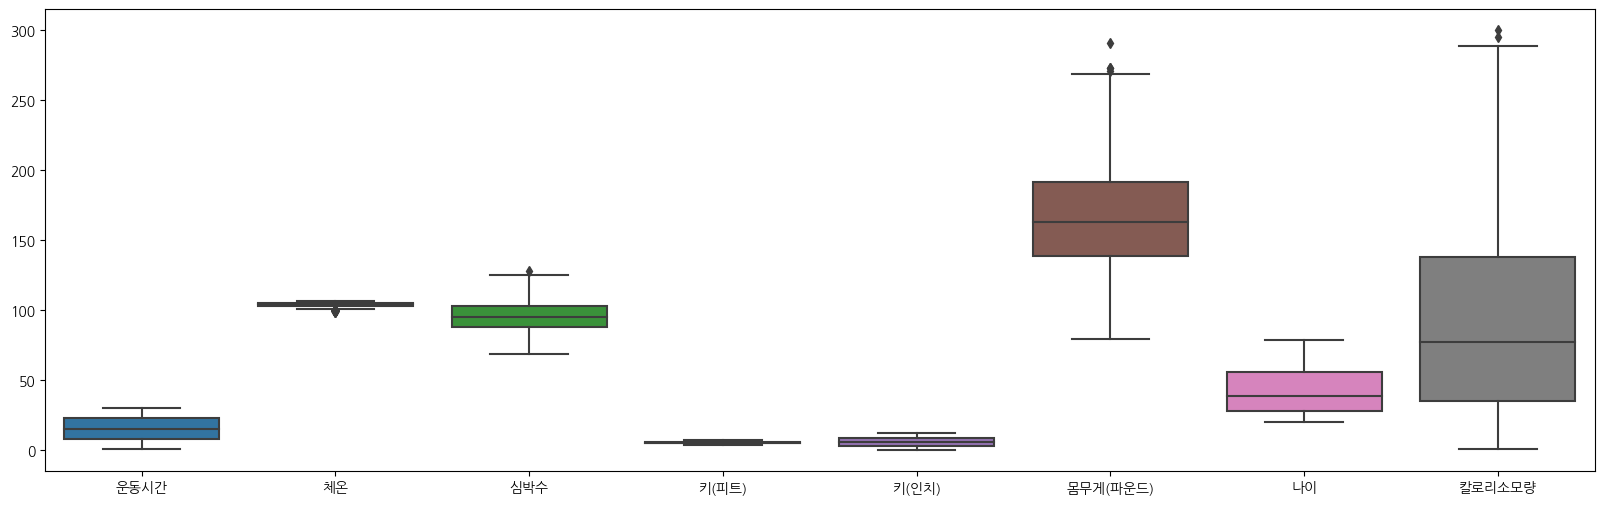

In [14]:
plt.figure(figsize = (20,6))
sns.boxplot(data = train)

<Axes: >

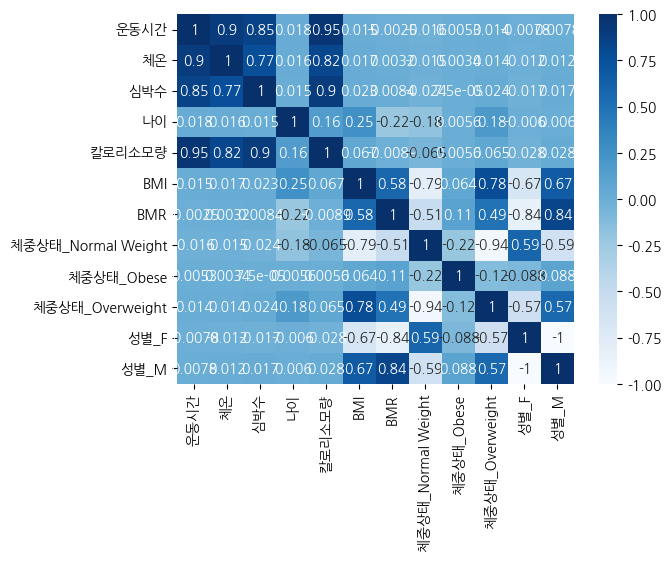

In [36]:
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')

In [16]:
train.head(3)

,ID,운동시간,체온,심박수,키(피트),키(인치),몸무게(파운드),체중상태,성별,나이,칼로리소모량
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0


In [17]:
train['키(cm)'] = (train['키(인치)'] * 2.54) + (train['키(피트)'] * 30.48)

In [18]:
train['몸무게(kg)'] = (train['몸무게(파운드)'] * 0.453592)

In [19]:
test['키(cm)'] = (test['키(인치)'] * 2.54) + (train['키(피트)'] * 30.48)
test['몸무게(kg)'] = (test['몸무게(파운드)'] * 0.453592)

In [20]:
train = train.drop(['키(인치)', '키(피트)', '몸무게(파운드)'], axis = 1)
test = test.drop(['키(인치)', '키(피트)', '몸무게(파운드)'], axis = 1)

In [21]:
train['체온'] = (train['체온'] - 32) * 5/9

In [22]:
test['체온'] = (test['체온'] - 32) * 5/9

<Axes: >

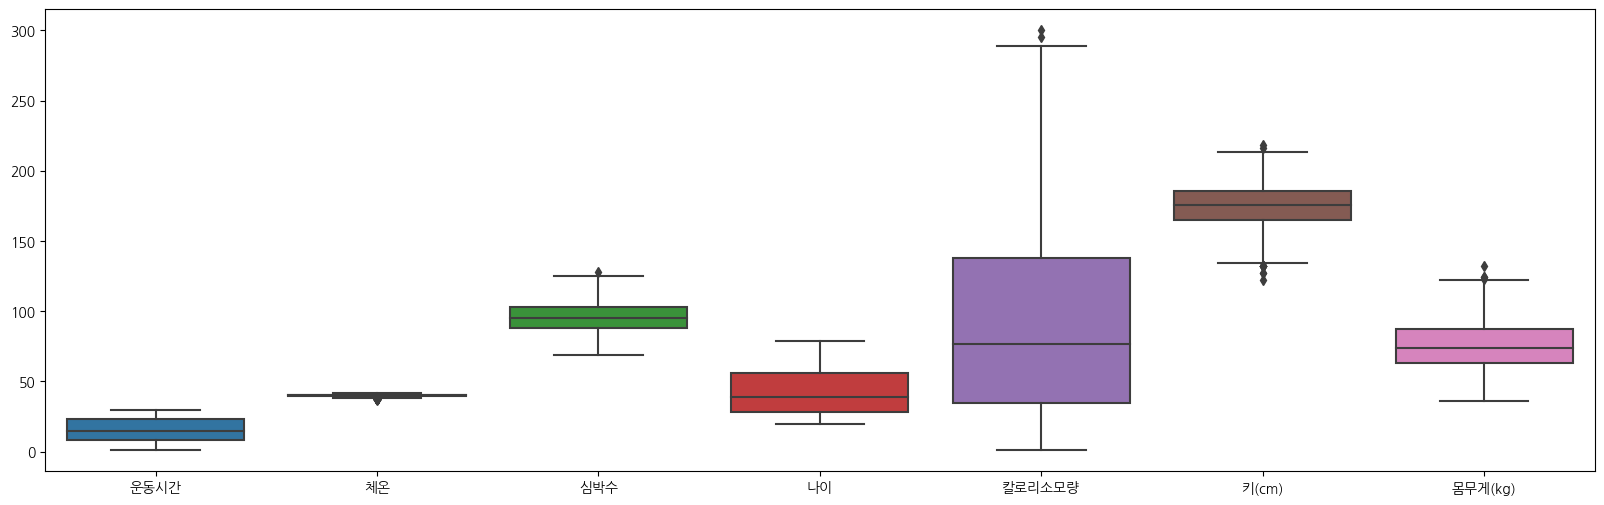

In [23]:
plt.figure(figsize = (20,6))
sns.boxplot(data = train)

In [24]:
train.columns

Index(['ID', '운동시간', '체온', '심박수', '체중상태', '성별', '나이', '칼로리소모량', '키(cm)',
       '몸무게(kg)'],
      dtype='object')

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수 분리
X = train[['운동시간', '체온', '심박수', '나이', '키(cm)','몸무게(kg)']]

# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor features
0    13.945215     운동시간
1  1041.296584       체온
2   362.015064      심박수
3     7.950939       나이
4  1847.846370    키(cm)
5   321.821776  몸무게(kg)


- 남자 BMR = 66 + (13.8 x 몸무게(kg)) + (5 x 키(cm)) - (6.8 x 나이)
- 여자 BMR = 655 + (9.6 x 몸무게(kg)) + (1.8 x 키(cm)) - (4.7 x 나이)

In [26]:
train['BMI'] = train['몸무게(kg)'] / ((train['키(cm)'] / 100) ** 2)
test['BMI'] = test['몸무게(kg)'] / ((test['키(cm)'] / 100) ** 2)

In [27]:
train

,ID,운동시간,체온,심박수,체중상태,성별,나이,칼로리소모량,키(cm),몸무게(kg),BMI
0,TRAIN_0000,26.0,40.888889,107.0,Normal Weight,F,45,166.0,175.26,69.989246,22.785874
1,TRAIN_0001,7.0,39.611111,88.0,Overweight,M,50,33.0,198.12,102.012841,25.989517
2,TRAIN_0002,7.0,39.611111,86.0,Overweight,M,29,23.0,190.50,99.019134,27.285327
3,TRAIN_0003,17.0,40.000000,99.0,Normal Weight,F,33,91.0,167.64,66.995538,23.839140
4,TRAIN_0004,9.0,39.277778,88.0,Normal Weight,M,38,32.0,177.80,77.019922,24.363493
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,40.611111,104.0,Normal Weight,F,75,151.0,147.32,50.983741,23.491366
7496,TRAIN_7496,20.0,40.722222,104.0,Normal Weight,F,21,114.0,172.72,66.995538,22.457459
7497,TRAIN_7497,8.0,39.500000,90.0,Overweight,M,57,41.0,187.96,91.988458,26.037691
7498,TRAIN_7498,12.0,40.222222,97.0,Overweight,M,35,57.0,175.26,76.022019,24.749919


In [28]:
def calculate_bmr(row):
    if row['성별'] == 'M':
        bmr = 10 * row['몸무게(kg)'] + 6.25 * row['키(cm)'] - 5 * row['나이'] + 5
    else:
        bmr = 10 * row['몸무게(kg)'] + 6.25 * row['키(cm)'] - 5 * row['나이'] - 161
    return bmr

In [29]:
train['BMR'] = train.apply(calculate_bmr, axis=1)

In [30]:
test['BMR'] = test.apply(calculate_bmr, axis=1)

In [31]:
test

,ID,운동시간,체온,심박수,체중상태,성별,나이,키(cm),몸무게(kg),BMI,BMR
0,TEST_0000,26.0,40.611111,107.0,Normal Weight,F,45,154.94,51.981643,21.653241,1102.191432
1,TEST_0001,29.0,40.500000,111.0,Overweight,M,21,187.96,89.992653,25.472770,1974.676528
2,TEST_0002,11.0,40.000000,90.0,Normal Weight,M,58,205.74,77.019922,18.195567,1771.074216
3,TEST_0003,24.0,40.777778,108.0,Overweight,M,35,182.88,88.994750,26.609209,1862.947504
4,TEST_0004,29.0,41.111111,116.0,Normal Weight,F,67,170.18,66.995538,23.132834,1237.580384
...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,40.888889,106.0,Normal Weight,M,51,152.40,81.011531,34.880035,1512.615312
7496,TEST_7496,4.0,38.888889,84.0,Overweight,M,25,177.80,83.007336,26.257475,1821.323360
7497,TEST_7497,24.0,40.611111,97.0,Normal Weight,F,42,187.96,59.012319,16.703666,1393.873192
7498,TEST_7498,8.0,39.500000,83.0,Normal Weight,F,48,165.10,61.008124,22.381723,1240.956240


In [32]:
train = train.set_index('ID')
test = test.set_index('ID')

In [33]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [34]:
train = train.drop(['키(cm)', '몸무게(kg)'], axis = 1)
test = test.drop(['키(cm)', '몸무게(kg)'], axis = 1)

In [35]:
train

,운동시간,체온,심박수,나이,칼로리소모량,BMI,BMR,체중상태_Normal Weight,체중상태_Obese,체중상태_Overweight,성별_F,성별_M
ID,,,,,,,,,,,,
TRAIN_0000,26.0,40.888889,107.0,45,166.0,22.785874,1409.267456,1,0,0,1,0
TRAIN_0001,7.0,39.611111,88.0,50,33.0,25.989517,2013.378408,0,0,1,0,1
TRAIN_0002,7.0,39.611111,86.0,29,23.0,27.285327,2040.816336,0,0,1,0,1
TRAIN_0003,17.0,40.000000,99.0,33,91.0,23.839140,1391.705384,1,0,0,1,0
TRAIN_0004,9.0,39.277778,88.0,38,32.0,24.363493,1696.449216,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_7495,22.0,40.611111,104.0,75,151.0,23.491366,894.587408,1,0,0,1,0
TRAIN_7496,20.0,40.722222,104.0,21,114.0,22.457459,1483.455384,1,0,0,1,0
TRAIN_7497,8.0,39.500000,90.0,57,41.0,26.037691,1814.634576,0,0,1,0,1


In [36]:
from xgboost import XGBRegressor
from sklearn import metrics


In [55]:
model = XGBRegressor(max_depth = 100, learning_rate = 0.05,
                     n_estimators = 1000, random_state = 42)


In [56]:
label = '칼로리소모량'
train_X = train.drop(columns = '칼로리소모량')

In [57]:
predict_XGB = model.fit(train_X, train[label]).predict(test)

In [58]:
df_submit['Calories_Burned'] = predict_XGB

In [59]:
df_submit.to_csv('xgb_hh.csv', index=False)

In [250]:
label = '칼로리소모량'